# Compare Covariance

In [1]:
import sacc
import numpy as np
import urllib.request
import os
import subprocess
from astropy.table import Table, vstack
import h5py as h
import matplotlib.pyplot as plt

In [2]:
kids_data = sacc.Sacc.load_fits('/global/cscratch1/sd/elp25/TXPipe_data/LATEST/kids1000/summary_statistics_real_raw_txpipecovnew.sacc')

In [3]:
kids_published_data = sacc.Sacc.load_fits('/global/cscratch1/sd/elp25/TXPipe_data/LATEST/kids1000/summary_statistics_real_raw_publishedcov.sacc')

/global/common/software/lsst/common/miniconda/prod/envs/desc/lib/python3.8/site-packages/sacc/sacc.py:370: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "
/global/common/software/lsst/common/miniconda/prod/envs/desc/lib/python3.8/site-packages/sacc/sacc.py:370: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "
/global/common/software/lsst/common/miniconda/prod/envs/desc/lib/python3.8/site-packages/sacc/sacc.py:370: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "
/global/common/software/lsst/common/miniconda/prod/envs/desc/lib/python3.8/site-packages/sacc/sacc.py:370: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "
/tmp/ipykernel_6115/984819455.py:6: RuntimeWarning: More

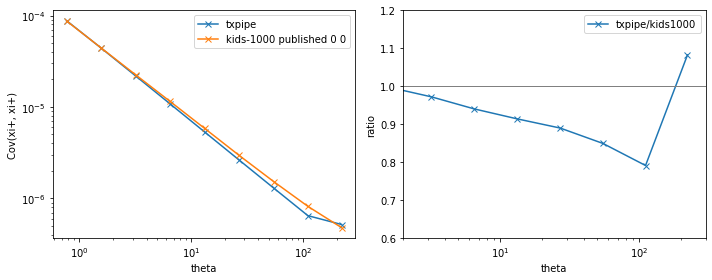

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

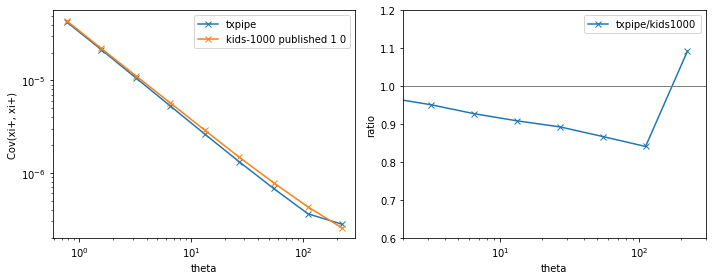

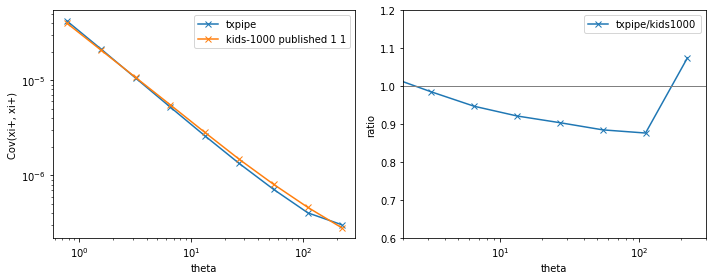

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

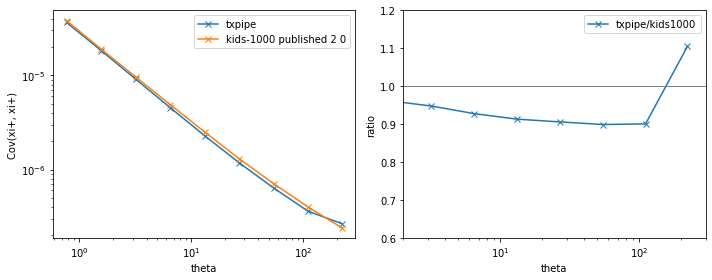

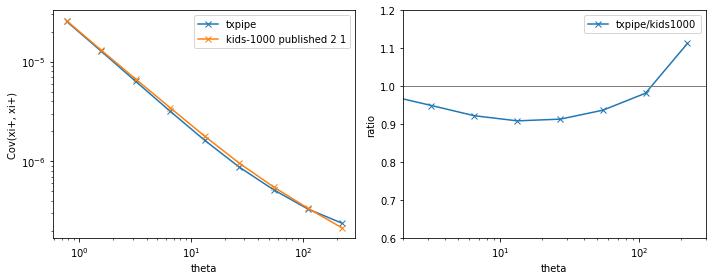

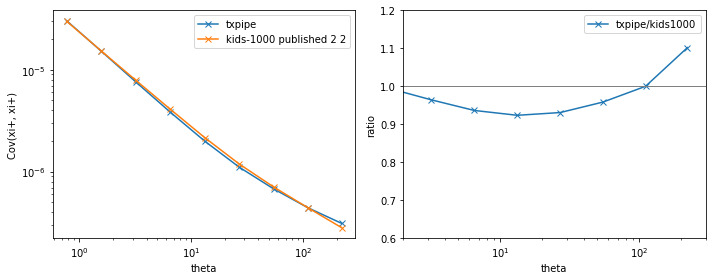

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

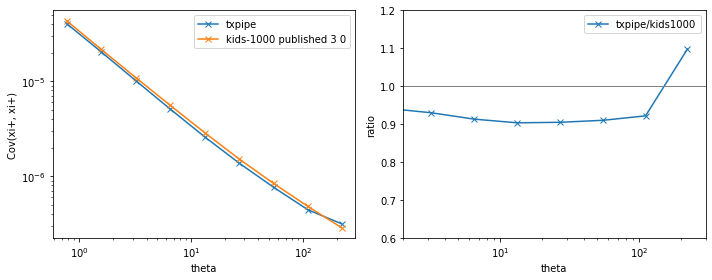

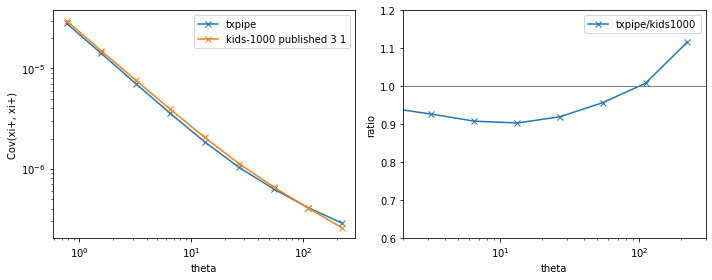

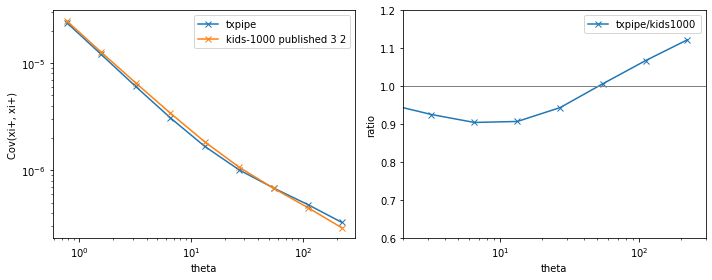

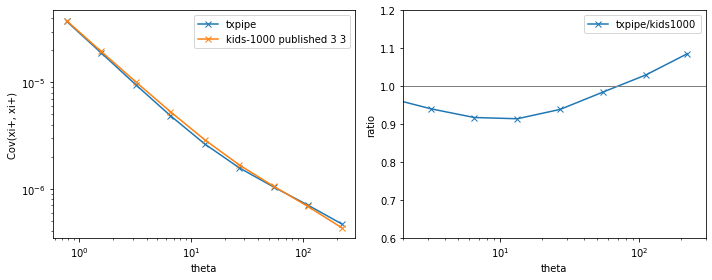

<Figure size 720x288 with 0 Axes>

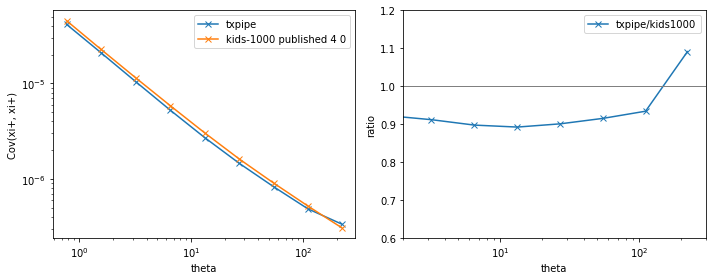

In [ ]:
dt='galaxy_shear_xi_plus'
kids1000 = kids_data
kids1000_pub = kids_published_data
for i in range(5):
        for j in range(5):
            plt.figure(figsize=(10,4))
            k = i+1
            l = j+1
            theta_txpipe, xi, cov_txpipe = kids1000.get_theta_xi(dt, 'source_%s' %i, 'source_%s' %j, return_cov=True)
            if len(theta_txpipe)==0:
                continue
            cov_txpipe = np.sqrt(np.diagonal(cov_txpipe))
            theta_pub, xi, cov_published = kids1000_pub.get_theta_xi(dt, 'source_'+ str(i), 'source_'+str(j), return_cov=True)
            cov_published = np.sqrt(np.diag(cov_published))

            plt.subplot(121)
            plt.loglog(theta_txpipe, cov_txpipe, marker='x', label='txpipe')
            plt.loglog(theta_pub, cov_published, marker='x', label='kids-1000 published '+str(i)+' '+str(j))

            plt.xlabel('theta')
            plt.ylabel('Cov(xi+, xi+)')
            plt.legend()

            plt.subplot(122)
            plt.semilogx(theta_pub, cov_txpipe[0:len(cov_published)]/cov_published, marker='x', label='txpipe/kids1000')
            plt.ylim(0.6,1.2)

            plt.xlabel('theta')
            plt.ylabel('ratio')
            plt.legend()
            plt.plot([2,300],[1,1], color='grey', lw=1)
            plt.xlim(2,300)
            plt.tight_layout()